In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt 
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = None
pd.options.display.max_columns = None
sns.set();

In [2]:
# Loading Data
data = pd.read_csv('houses_Madrid.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  8228 non-null   float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      1437 non-null   float64
 9   sq_mt_allotment               1432 non-null   float64
 10  latitude                      0 non-null      float64
 11  longitude                     0 non-null      float64
 12  raw_address                   16277 non-null  object 
 13  i

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  8228 non-null   float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      1437 non-null   float64
 9   sq_mt_allotment               1432 non-null   float64
 10  latitude                      0 non-null      float64
 11  longitude                     0 non-null      float64
 12  raw_address                   16277 non-null  object 
 13  i

<h3>Data Dictionary</h3>

<table>
	<thead>
		<tr>
			<th>Variable Name</th>
			<th>Description</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<td>ID</td>
			<td>Identifier ID</td>
		</tr>
		<tr>
			<td>title</td>
			<td>Title from listing</td>
		</tr>
		<tr>
			<td>subtitle</td>
			<td>Neighborhood and city</td>
		</tr>
		<tr>
			<td>sq_mt_built</td>
			<td>Square meter built</td>
		</tr>
		<tr>
			<td>sq_mt_useful</td>
			<td>Square meter useful</td>
		</tr>
		<tr>
			<td>n_rooms</td>
			<td>Number of rooms</td>
		</tr>
		<tr>
			<td>n_bathrooms</td>
			<td>Number of bathrooms</td>
		</tr>
		<tr>
			<td>sq_mt_allotment</td>
			<td>Square meter allotment</td>
		</tr>
		<tr>
			<td>latitude, longitude</td>
			<td>Latitude, Longitude (Since portals hide the location mainly NAs)</td>
		</tr>
		<tr>
			<td>raw_address</td>
			<td>Address</td>
		</tr>
		<tr>
			<td>is_exact_address_hidden</td>
			<td>Boolean values</td>
		</tr>
		<tr>
			<td>buy_price</td>
			<td>Target Value</td>
		</tr>
	</tbody>
</table>



* Remove Nan columns
* Get Specific columns for processing
* Check if there are duplicated rows

In [5]:
# Check duplicated rows
data.duplicated().sum()

0

In [6]:
# Taking only needed columns
df = data[['id', 'subtitle', 'sq_mt_built', 	'n_rooms',	'n_bathrooms', 'rent_price', 'buy_price', 'buy_price_by_area' ]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21742 non-null  int64  
 1   subtitle           21742 non-null  object 
 2   sq_mt_built        21616 non-null  float64
 3   n_rooms            21742 non-null  int64  
 4   n_bathrooms        21726 non-null  float64
 5   rent_price         21742 non-null  int64  
 6   buy_price          21742 non-null  int64  
 7   buy_price_by_area  21742 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.3+ MB


* Change `subtitle` column into `city`, `raw_address` into `address`
* Check what you will do in NaN Values

In [7]:
df = df.rename(columns= {'subtitle' : 'city'})

In [8]:
# Add Mode into NaN cells in n_bathrooms column
df.n_bathrooms.mode()

0   1.00
Name: n_bathrooms, dtype: float64

In [9]:
df.n_bathrooms.fillna(1, inplace=True)
df.n_bathrooms = df.n_bathrooms.replace(0,1)

In [10]:
# Convert n_bathrooms type into integer
df.n_bathrooms = df.n_bathrooms.astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21742 non-null  int64  
 1   city               21742 non-null  object 
 2   sq_mt_built        21616 non-null  float64
 3   n_rooms            21742 non-null  int64  
 4   n_bathrooms        21742 non-null  int32  
 5   rent_price         21742 non-null  int64  
 6   buy_price          21742 non-null  int64  
 7   buy_price_by_area  21742 non-null  int64  
dtypes: float64(1), int32(1), int64(5), object(1)
memory usage: 1.2+ MB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,"21,742.00","10,871.50","6,276.52",1.00,"5,436.25","10,871.50","16,306.75","21,742.00"
sq_mt_built,"21,616.00",146.92,134.18,13.00,70.00,100.00,162.00,999.00
n_rooms,"21,742.00",3.01,1.51,0.00,2.00,3.00,4.00,24.00
n_bathrooms,"21,742.00",2.09,1.41,1.00,1.00,2.00,2.00,16.00
rent_price,"21,742.00","-59,170.31","917,116.18","-34,590,276.00",725.00,"1,116.00","1,687.00","2,517.00"
buy_price,"21,742.00","653,735.65","782,082.07","36,000.00","198,000.00","375,000.00","763,600.00","8,800,000.00"
buy_price_by_area,"21,742.00","4,020.52","1,908.42",447.00,"2,551.00","3,720.00","5,000.00","18,889.00"


In [13]:
# Drop sq_mt_built NaN rows
df.dropna(subset='sq_mt_built', inplace=True)

In [14]:
# Split City column to (district, city)
df['district'] = df.city.str.split(',', expand= True)[0]

In [15]:
df = df[['id', 'district', 'sq_mt_built', 'n_rooms', 'n_bathrooms',
       'buy_price', 'buy_price_by_area']]
df.head()

,id,district,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area
0,21742,San Cristóbal,64.00,2,1,85000,1328
1,21741,Los Ángeles,70.00,3,1,129900,1856
2,21740,San Andrés,94.00,2,2,144247,1535
3,21739,San Andrés,64.00,2,1,109900,1717
4,21738,Los Rosales,108.00,2,2,260000,2407


In [16]:
px.box(data_frame=df, x='buy_price', title='Distribution of Buy_Price columns')

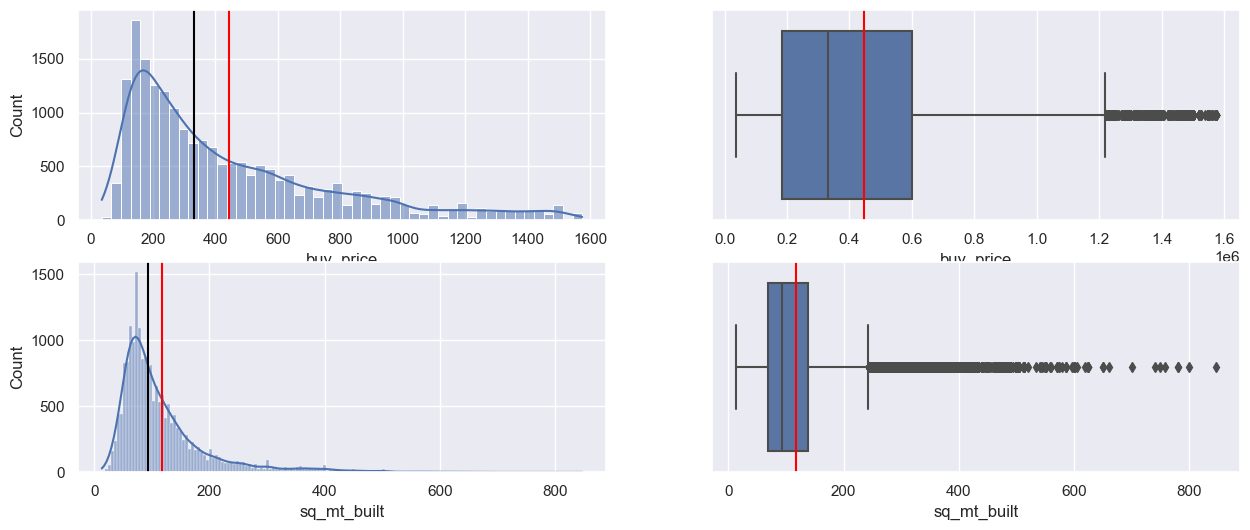

In [25]:
fig, ax = plt.subplots(2,2, figsize=(15,6))
sns.histplot(data=df, x= df['buy_price'] / 1000, kde=True, ax=ax[0][0])
ax[0][0].axvline(df.buy_price.mean() / 1000, color='red')
ax[0][0].axvline(df.buy_price.median() / 1000, color='black')

sns.boxplot(data=df, x= df['buy_price'], ax=ax[0][1])
ax[0][1].axvline(df.buy_price.mean(), color='red')

sns.histplot(data=df, x= df['sq_mt_built'], kde=True, ax=ax[1][0])
ax[1][0].axvline(df.sq_mt_built.mean(), color='red')
ax[1][0].axvline(df.sq_mt_built.median(), color='black')

sns.boxplot(data=df, x= df['sq_mt_built'], ax=ax[1][1])
ax[1][1].axvline(df.sq_mt_built.mean(), color='red');

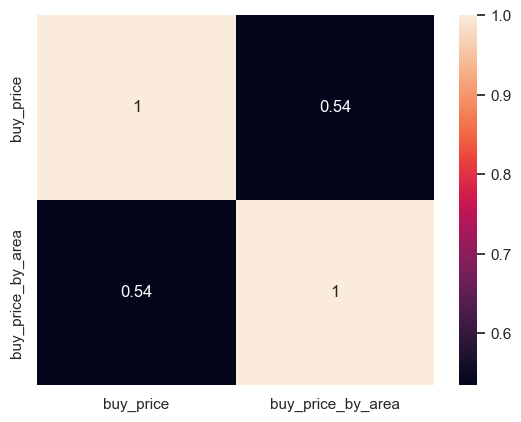

In [26]:
sns.heatmap(df[['buy_price', 'buy_price_by_area']].corr(), annot=True);

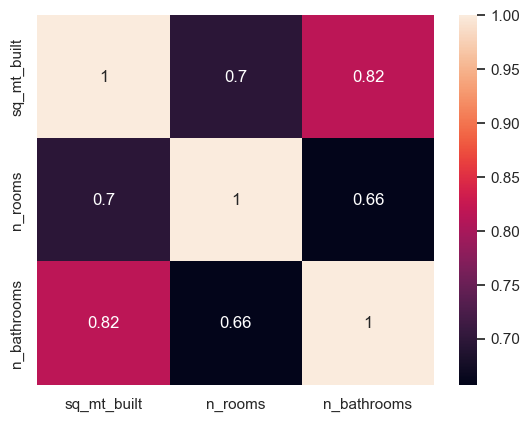

In [27]:
sns.heatmap(df.drop(columns=['id' , 'buy_price', 'buy_price_by_area'] ).select_dtypes('number').corr(), annot=True);

In [28]:
df = df[['id', 'sq_mt_built', 'buy_price', 'district']]

In [29]:
df.select_dtypes('object').nunique()

district    146
dtype: int64

In [30]:
# We are interested in preditct prices for houses less than median
df = df[df.buy_price < df.buy_price.median()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9758 entries, 0 to 21734
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           9758 non-null   int64  
 1   sq_mt_built  9758 non-null   float64
 2   buy_price    9758 non-null   int64  
 3   district     9758 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 381.2+ KB


In [31]:
df.to_csv('madrid_last.csv')

In [308]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,"9,758.00","12,701.36","6,694.95",8.00,"5,776.25","15,181.50","18,870.75","21,742.00"
sq_mt_built,"9,758.00",73.50,25.20,13.00,57.00,70.00,87.00,485.00
buy_price,"9,758.00","194,408.42","65,302.51","36,000.00","140,000.00","185,000.00","249,000.00","329,900.00"


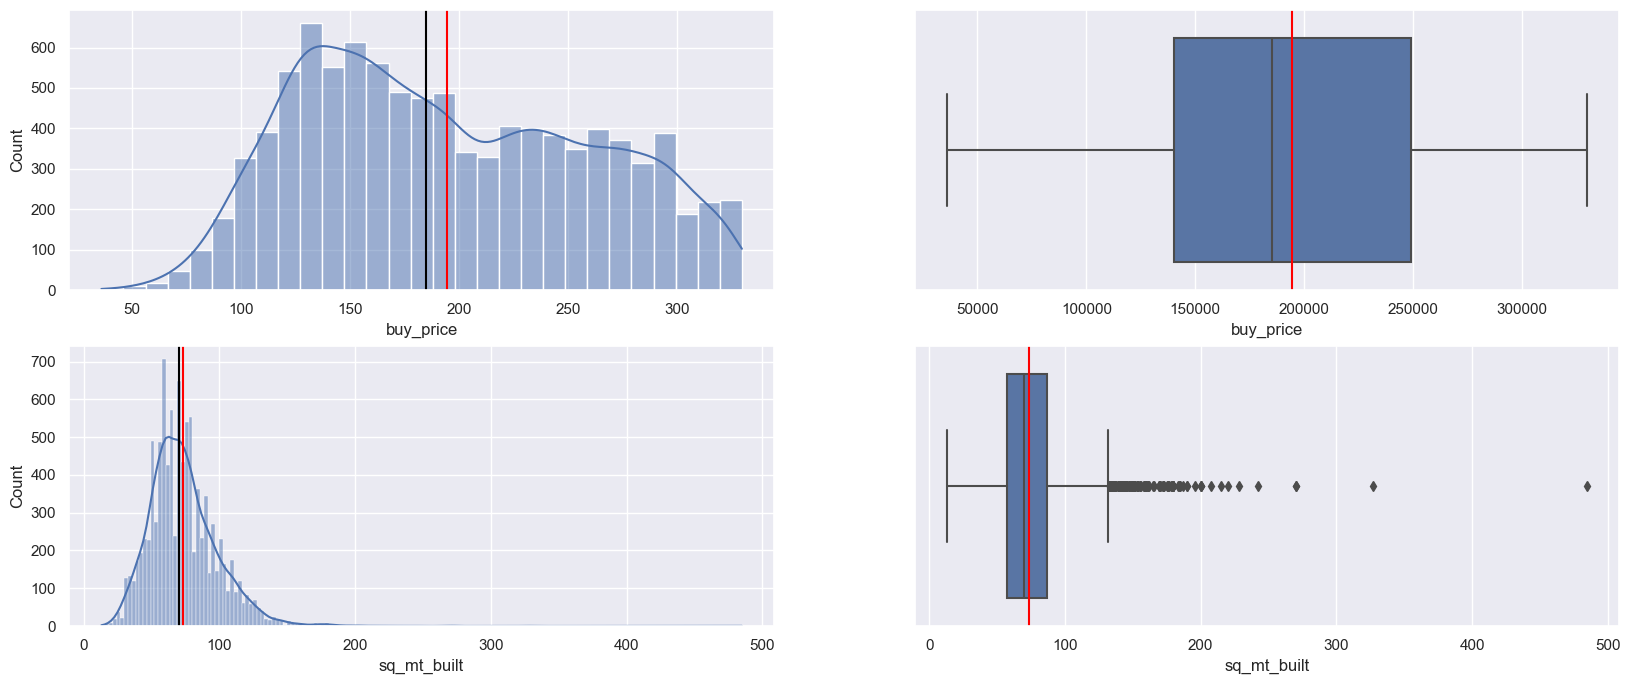

In [237]:
fig, ax = plt.subplots(2,2, figsize=(20,8))
sns.histplot(data=df, x= df['buy_price'] / 1000, kde=True, ax=ax[0][0])
ax[0][0].axvline(df.buy_price.mean() / 1000, color='red')
ax[0][0].axvline(df.buy_price.median() / 1000, color='black')

sns.boxplot(data=df, x= df['buy_price'], ax=ax[0][1])
ax[0][1].axvline(df.buy_price.mean(), color='red')

sns.histplot(data=df, x= df['sq_mt_built'], kde=True, ax=ax[1][0])
ax[1][0].axvline(df.sq_mt_built.mean(), color='red')
ax[1][0].axvline(df.sq_mt_built.median(), color='black')

sns.boxplot(data=df, x= df['sq_mt_built'], ax=ax[1][1])
ax[1][1].axvline(df.sq_mt_built.mean(), color='red');

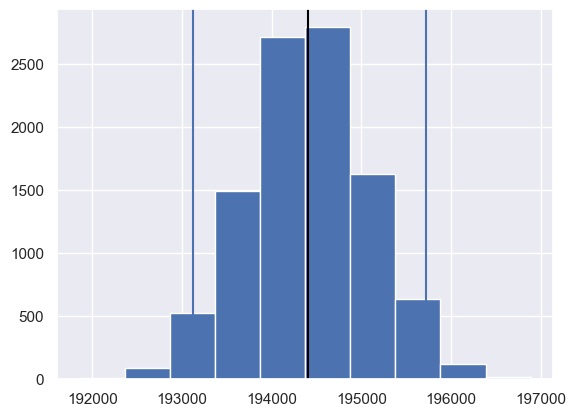

In [238]:
# Confidence interval
price_means = []
for i in range(10000):
    mean = df.buy_price.sample(len(df), replace=True).mean()
    price_means.append(mean)
plt.hist(price_means)
# null_val = np.random.normal(np.mean(price_means), np.std(price_means), 10000)
# plt.hist(null_val)
# plt.axvline(np.mean(price_means), color='r')
plt.axvline(df.buy_price.mean(), color='black')
plt.axvline(np.percentile(price_means, 97.5))
plt.axvline(np.percentile(price_means, 2.5));

In [321]:
top10_districts = df.groupby(['district'], as_index=False).aggregate({'buy_price' : 'mean'}).sort_values('buy_price', ascending=False).head(10)['district']
top10_districts

53                      Estrella
14             Arroyo del Fresno
58                          Goya
4               Alameda de Osuna
15                       Atalaya
29                    Castellana
125                   Valdemarín
16           Barrio de Salamanca
70                         Lista
123    Valdebebas - Valdefuentes
Name: district, dtype: object

In [322]:
px.scatter(data_frame=df[df.district.isin(top10_districts)], x='sq_mt_built', y='buy_price', color='district')

----------------------------

In [235]:
df[['district', 'sq_mt_built',
       'buy_price']].sample(14000).to_csv('train.csv', index=False)

df[['district', 'sq_mt_built']].sample(3452).to_csv('test.csv', index=False)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [ ]:
# df.to_csv('Madrid_cleaned_data.csv', index=False)

In [ ]:
import warnings
from category_encoders import OneHotEncoder
from IPython.display import VimeoVideo
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact

warnings.simplefilter(action="ignore", category=FutureWarning)

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,district,sq_mt_built,buy_price
0,Malasaña-Universidad,50.00,320000
1,Pueblo Nuevo,107.00,800000
2,Moncloa,390.00,1090000
3,Los Rosales,85.00,159000
4,Goya,210.00,960000


# Split Data

In [ ]:
target = df['buy_price']
features = df[['district', 'sq_mt_built']]
X_train = features
y_train = target

# Build Model

### Baselin - mean_absolute_error

In [ ]:
y_mean = y_train.mean()
y_baseline = [y_mean] * len(y_train)
mae = mean_absolute_error(y_train, y_baseline)
print("Mean apt price:", round(y_mean,2))
print("Baseline MAE:", round(mae,2))

Mean apt price: 445699.6
Baseline MAE: 266793.93


## Iterate - make pipeline

In [ ]:
model = make_pipeline(OneHotEncoder(use_cat_names=True) , SimpleImputer(), Ridge())
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['district'], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

In [ ]:
check_is_fitted(model[-1])

In [ ]:
y_predict_training = model.predict(X_train)
print('MAE for predict training: ', mean_absolute_error(y_train, y_predict_training))

MAE for predict training:  92910.93204236208


In [ ]:
X_test = pd.read_csv('test.csv')
y_test = pd.Series(model.predict(X_test))
y_test.head()

0   176,897.85
1   411,093.40
2    90,899.21
3   581,870.40
4   287,096.87
dtype: float64

In [ ]:
def make_prediction(district, sqm2):
    df = {
        'district' : district,
        'sq_mt_built' : sqm2
    }
    df = pd.DataFrame(df, index=[0])
    prediction = model.predict(df).round(2)[0]
    return f"Predicted apartment price: ${prediction}"

In [ ]:
interact(
    make_prediction,
    sqm2=IntSlider(
        min=X_train["sq_mt_built"].min(),
        max=X_train["sq_mt_built"].max(),
        value=X_train["sq_mt_built"].mean(),
    ),
    # lat=FloatSlider(
    #     min=X_train["lat"].min(),
    #     max=X_train["lat"].max(),
    #     step=0.01,
    #     value=X_train["lat"].mean(),
    # ),
    # lon=FloatSlider(
    #     min=X_train["lon"].min(),
    #     max=X_train["lon"].max(),
    #     step=0.01,
    #     value=X_train["lon"].mean(),
    # ),
    district=Dropdown(options=sorted(X_train["district"].unique())),
);

interactive(children=(Dropdown(description='district', options=('12 de Octubre-Orcasur', 'Abrantes', 'Acacias'…

------------------------

In [ ]:
fun = df[df.district == 'Fuencarral']

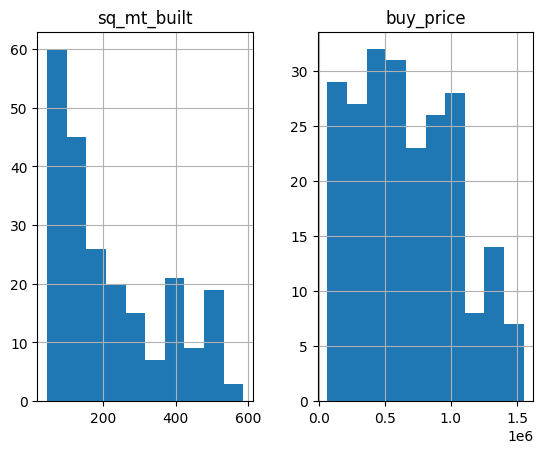

In [ ]:
fun.hist();

In [ ]:
fun.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225 entries, 41 to 13991
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   district     225 non-null    object 
 1   sq_mt_built  225 non-null    float64
 2   buy_price    225 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 7.0+ KB


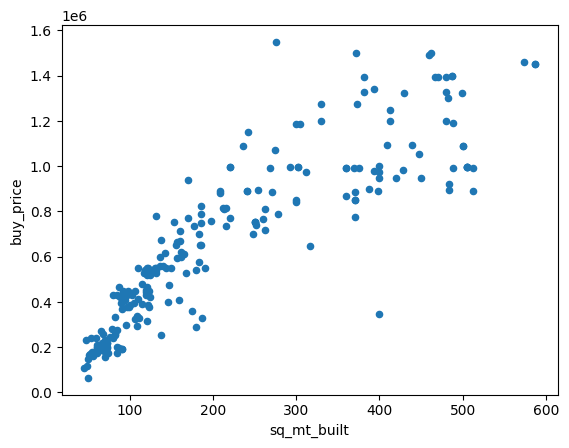

In [ ]:
fun.plot(kind='scatter', x='sq_mt_built', y='buy_price');